In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_excel("C:/Users/Dayakar Reddy Sura/Downloads/heart_disease.xlsx",sheet_name='Heart_disease')

In [3]:
data.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.shape

(908, 13)

In [6]:
data[data.duplicated()]

age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

    exang  oldpeak        slope    thal  num  
765  True      0.0  downsloping  normal    2

In [7]:
data.iloc[765:,:]

age   sex            cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male   non-anginal       150   219  False  st-t abnormality     118   
766   69  Male  asymptomatic       184   236   True            normal     131   
767   58  Male   non-anginal       158   232  False  st-t abnormality     138   
768   60  Male  asymptomatic       192   281  False  st-t abnormality     107   
769   51  Male  asymptomatic       135     0   True  st-t abnormality     192   
..   ...   ...           ...       ...   ...    ...               ...     ...   
903   53  Male  asymptomatic       125     0  False            normal     120   
904   62  Male  asymptomatic       166   170  False  st-t abnormality     120   
905   56  Male   non-anginal       170     0  False    lv hypertrophy     123   
906   56  Male   non-anginal       144   208   True  st-t abnormality     105   
907   57  Male  asymptomatic       142   277   True  st-t abnormality     182   

     exang  oldpeak        slope               thal  num  
765   True      0.0  downsloping             normal    2  
766   TURE      NaN         flat             normal    2  
767   TURE      NaN  downsloping             normal    2  
768   TURE      NaN    upsloping             normal    2  
769  FALSE      NaN    upsloping             normal    2  
..     ...      ...          ...                ...  ...  
903  False      1.5    upsloping  reversable defect    4  
904   True      3.0         flat  reversable defect    4  
905   True      2.5  downsloping             normal    4  
906   TURE      NaN  downsloping       fixed defect    4  
907  FALSE      NaN         flat  reversable defect    4  

[143 rows x 13 columns]

In [8]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
data1=data.dropna()

In [10]:
data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: ylabel='Frequency'>

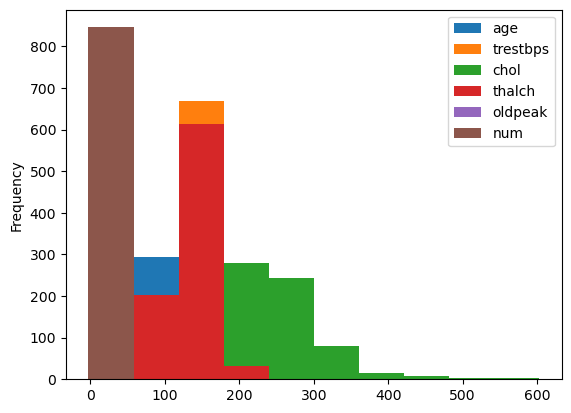

In [11]:
data1.plot(kind='hist')

<Axes: >

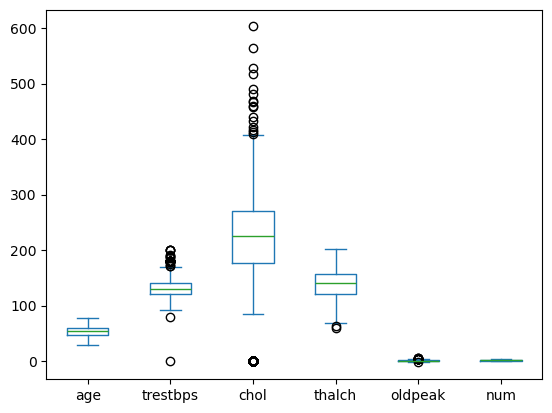

In [12]:
data1.plot(kind='box')

<Axes: ylabel='Frequency'>

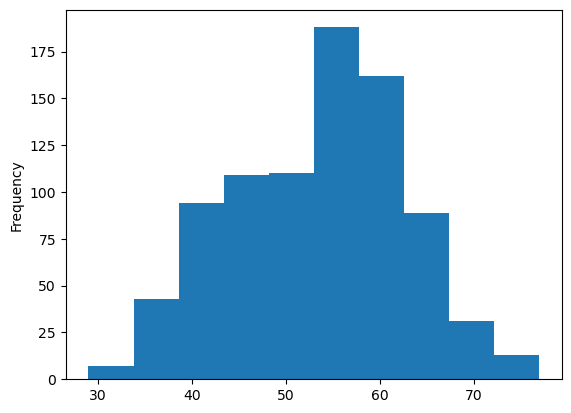

In [13]:
data1.age.plot(kind='hist')

<Axes: >

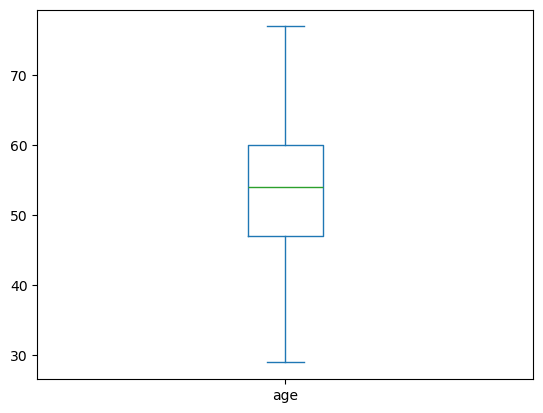

In [14]:
data1.age.plot(kind='box')

<Axes: ylabel='Frequency'>

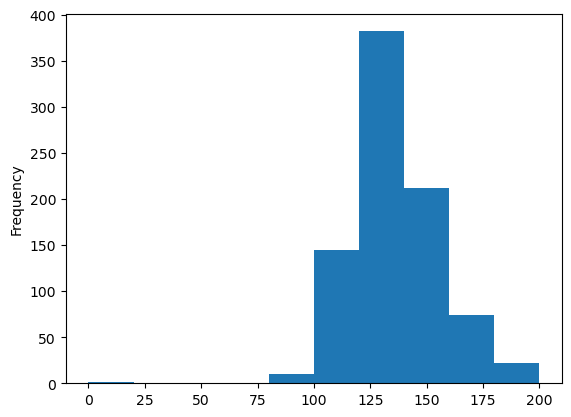

In [15]:
data1.trestbps.plot(kind='hist')

<Axes: >

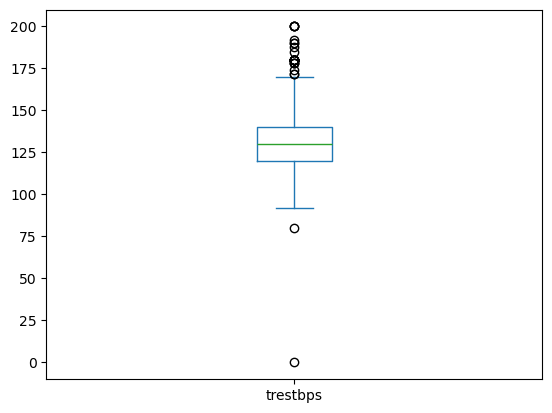

In [16]:
data1.trestbps.plot(kind='box')

<Axes: ylabel='Frequency'>

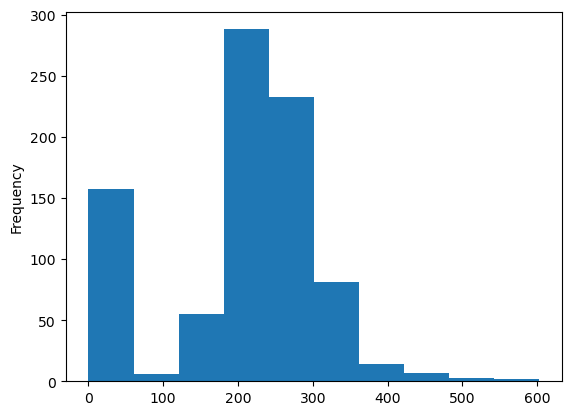

In [17]:
data1.chol.plot(kind='hist')

<Axes: >

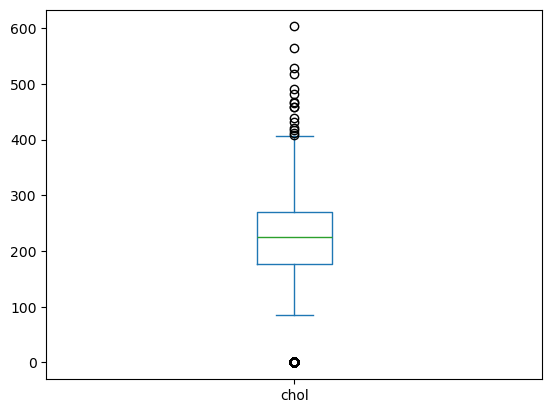

In [18]:
data1.chol.plot(kind='box')

<Axes: ylabel='Frequency'>

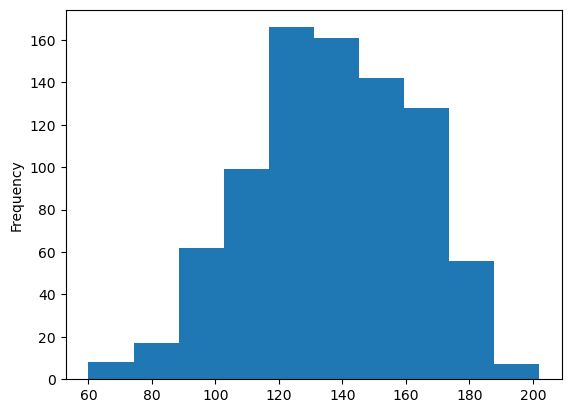

In [19]:
data1.thalch.plot(kind='hist')

<Axes: >

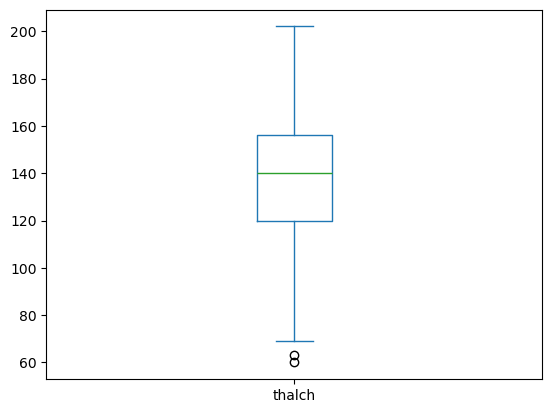

In [20]:
data1.thalch.plot(kind='box')

<Axes: ylabel='Frequency'>

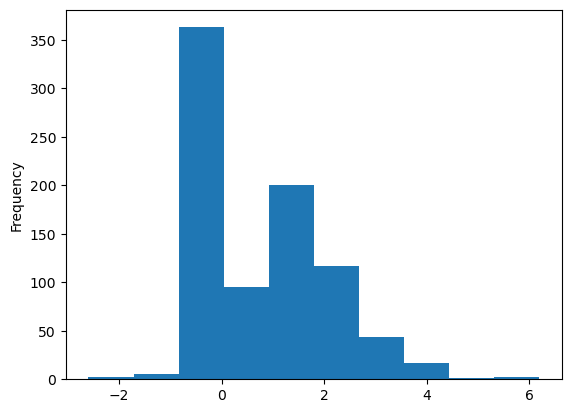

In [21]:
data1.oldpeak.plot(kind='hist')

<Axes: >

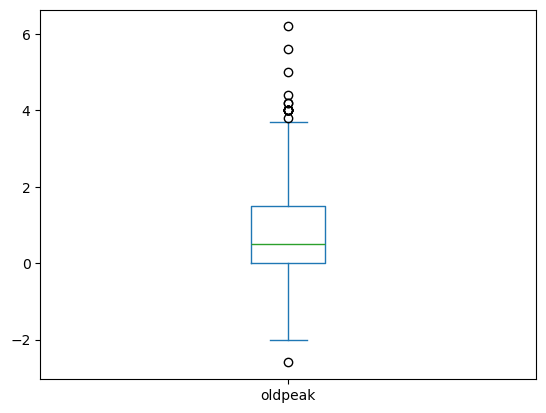

In [22]:
data1.oldpeak.plot(kind='box')

<Axes: ylabel='Frequency'>

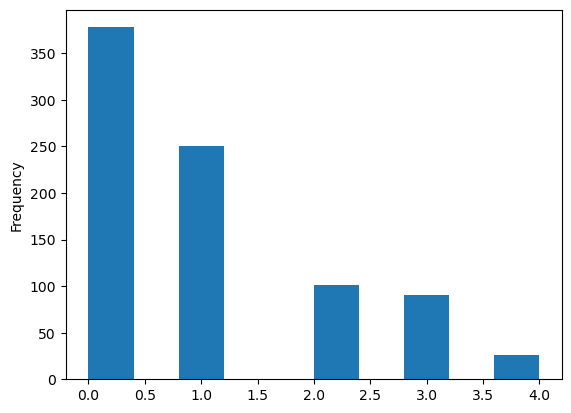

In [23]:
data1.num.plot(kind='hist')

<Axes: >

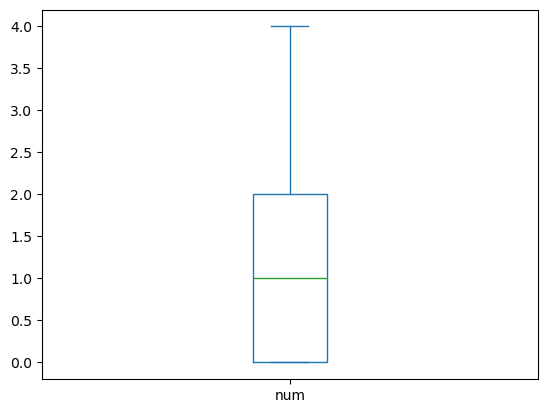

In [24]:
data1.num.plot(kind='box')

In [25]:
data1.sex.value_counts()

Male      657
Female    189
Name: sex, dtype: int64

In [26]:
data1.cp.value_counts()

asymptomatic       464
non-anginal        184
atypical angina    158
typical angina      40
Name: cp, dtype: int64

In [27]:
data1.fbs.value_counts()

False    688
True     158
Name: fbs, dtype: int64

In [28]:
data1.restecg.value_counts()

normal              520
lv hypertrophy      180
st-t abnormality    146
Name: restecg, dtype: int64

In [29]:
data1.exang.value_counts()

False    512
True     333
FALSE      1
Name: exang, dtype: int64

In [30]:
data1.slope.value_counts()

flat           425
upsloping      276
downsloping    145
Name: slope, dtype: int64

In [31]:
data1.thal.value_counts()

normal               364
reversable defect    324
fixed defect         158
Name: thal, dtype: int64

In [32]:
data1.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [33]:
data1.corr()

C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_5716\3734675979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


age  trestbps      chol       fbs    thalch   oldpeak       num
age       1.000000  0.244301 -0.107471  0.176690 -0.345960  0.242662  0.331399
trestbps  0.244301  1.000000  0.100912  0.098255 -0.109390  0.167131  0.126158
chol     -0.107471  0.100912  1.000000 -0.123729  0.224456  0.029898 -0.256191
fbs       0.176690  0.098255 -0.123729  1.000000 -0.061331  0.024365  0.137588
thalch   -0.345960 -0.109390  0.224456 -0.061331  1.000000 -0.139598 -0.350331
oldpeak   0.242662  0.167131  0.029898  0.024365 -0.139598  1.000000  0.437577
num       0.331399  0.126158 -0.256191  0.137588 -0.350331  0.437577  1.000000

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


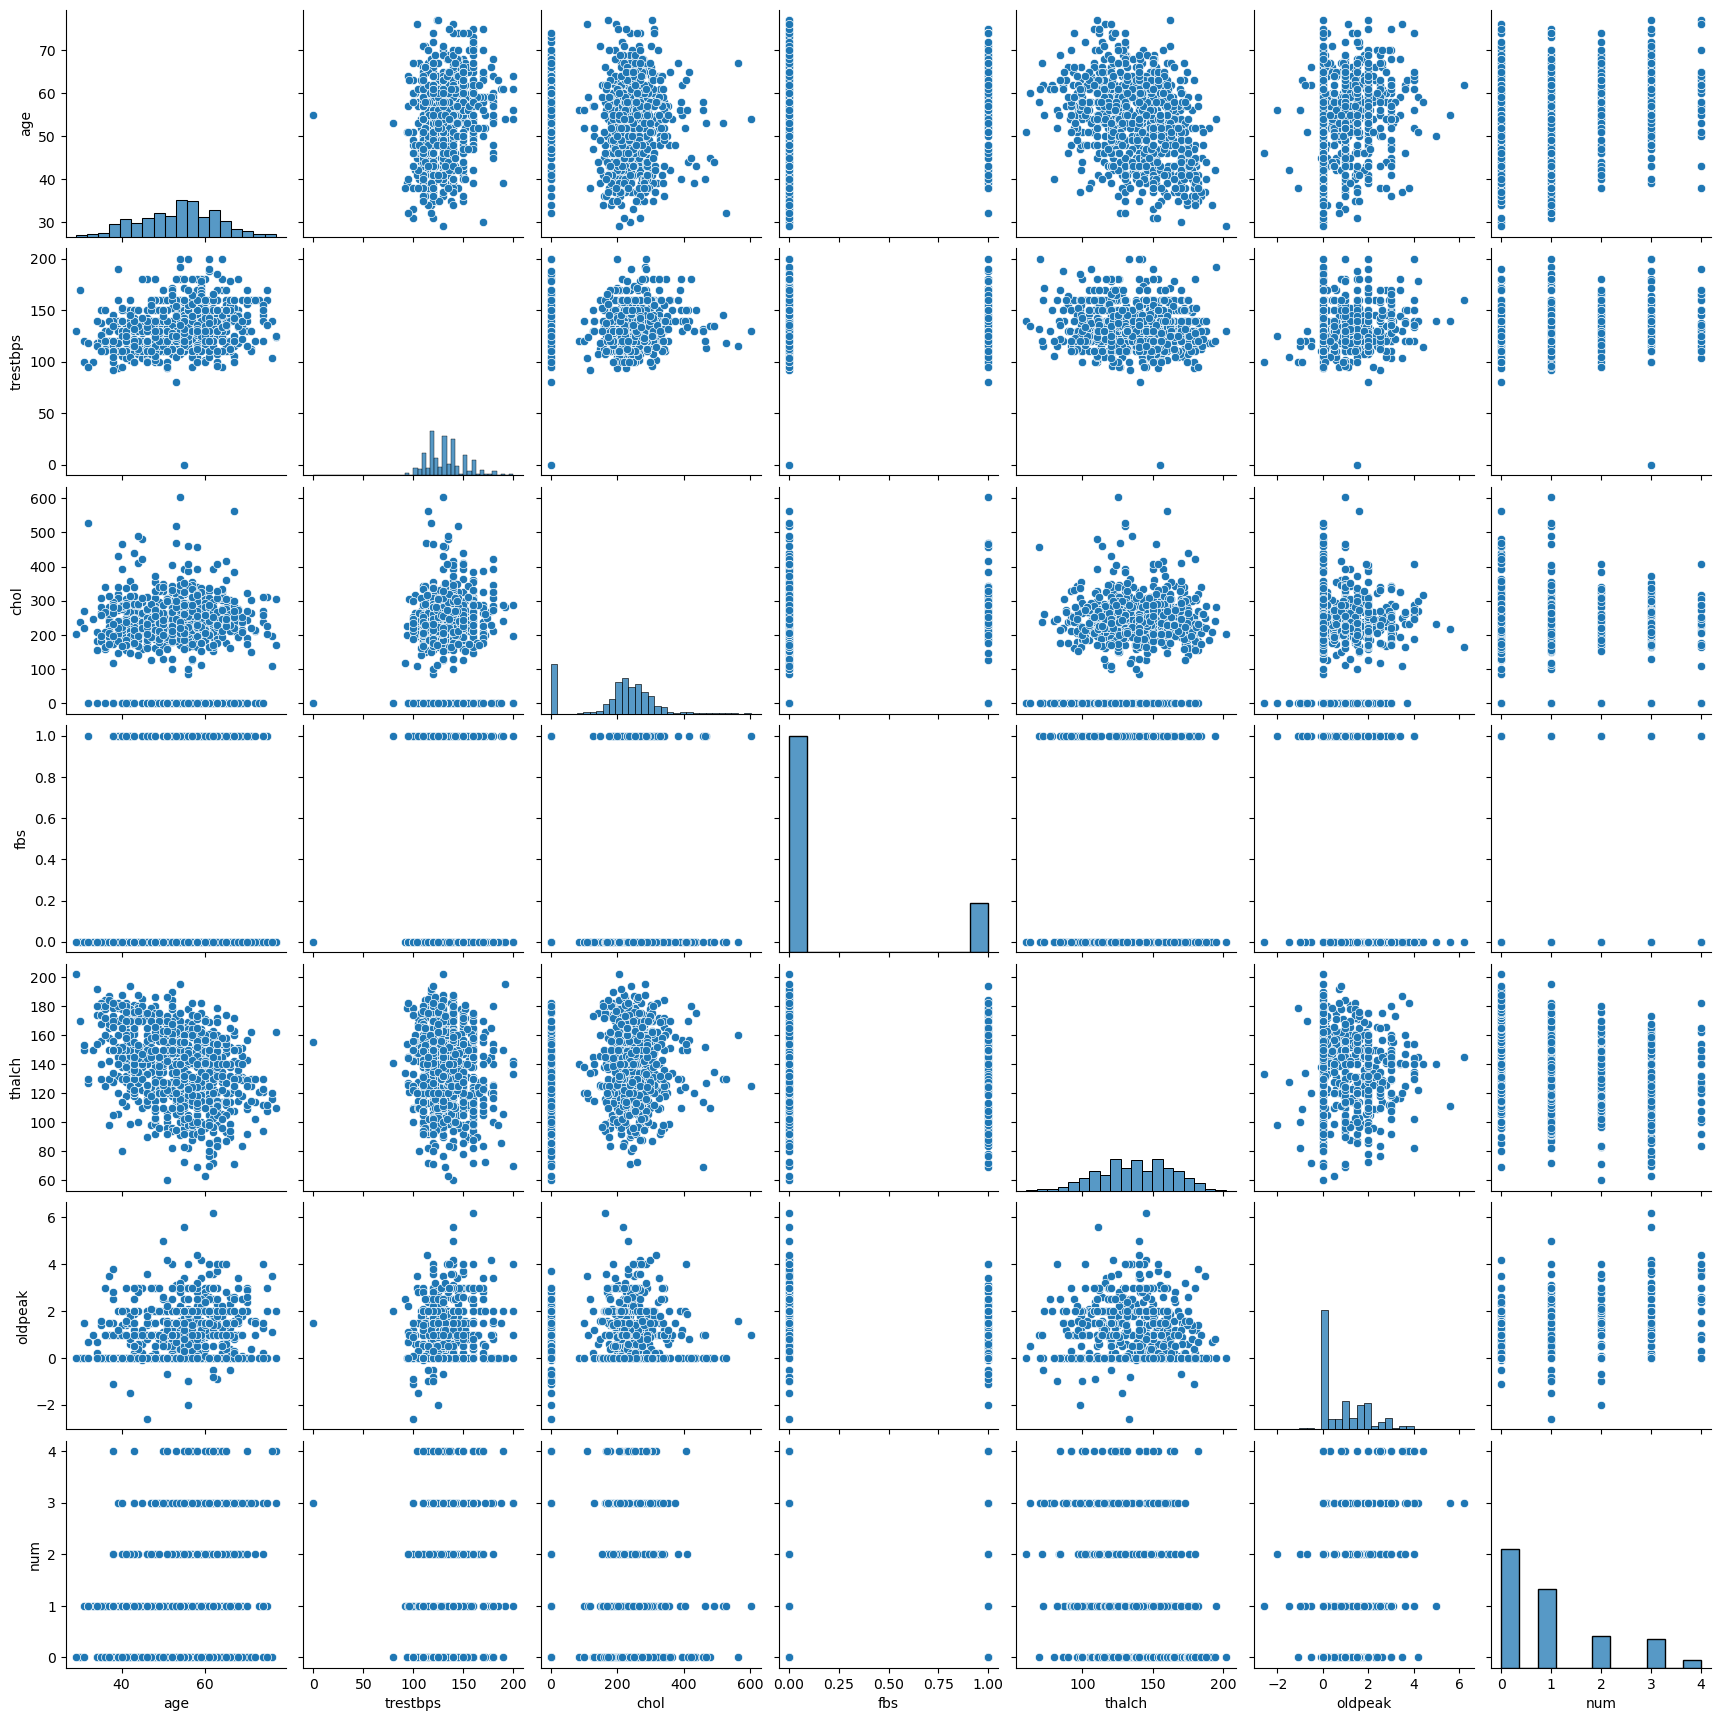

In [35]:
sns.pairplot(data1)

In [148]:
data2=data1.drop(['fbs','exang'],axis=1)
data2.head()

age  sex  cp  trestbps  chol  restecg  thalch  oldpeak        slope  \
0   63    1   3       145   233        0     150      2.3  downsloping   
1   41    1   1       135   203        1     132      0.0         flat   
2   57    1   0       140   192        1     148      0.4         flat   
3   52    1   3       118   186        0     190      0.0         flat   
4   57    1   0       110   201        1     126      1.5         flat   

           thal  num  
0  fixed defect    0  
1  fixed defect    0  
2  fixed defect    0  
3  fixed defect    0  
4  fixed defect    0

In [149]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data2.columns:
    if data2[col].dtype == 'object':  # Check if the column is categorical
        data2[col] = labelencoder.fit_transform(data2[col])
data2

age  sex  cp  trestbps  chol  restecg  thalch  oldpeak  slope  thal  num
0     63    1   3       145   233        0     150      2.3      0     0    0
1     41    1   1       135   203        1     132      0.0      1     0    0
2     57    1   0       140   192        1     148      0.4      1     0    0
3     52    1   3       118   186        0     190      0.0      1     0    0
4     57    1   0       110   201        1     126      1.5      1     0    0
..   ...  ...  ..       ...   ...      ...     ...      ...    ...   ...  ...
901   51    1   0       110     0        1      92      0.0      1     0    4
902   62    1   0       160   254        2     108      3.0      1     1    4
903   53    1   0       125     0        1     120      1.5      2     2    4
904   62    1   0       166   170        2     120      3.0      1     2    4
905   56    1   2       170     0        0     123      2.5      0     1    4

[846 rows x 11 columns]

In [150]:
#data=pd.get_dummies(data1)
#data2.head()

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scale=StandardScaler()
scaler_data=scale.fit_transform(data2)

In [153]:
scaler_data

array([[ 1.05284932,  0.53634992,  2.358435  , ..., -1.67799828,
        -1.6412144 , -0.86862112],
       [-1.36636445,  0.53634992,  0.24930603, ..., -0.2249926 ,
        -1.6412144 , -0.86862112],
       [ 0.39306375,  0.53634992, -0.80525846, ..., -0.2249926 ,
        -1.6412144 , -0.86862112],
       ...,
       [-0.0467933 ,  0.53634992, -0.80525846, ...,  1.22801307,
         1.10279228,  2.67711334],
       [ 0.94288506,  0.53634992, -0.80525846, ..., -0.2249926 ,
         1.10279228,  2.67711334],
       [ 0.28309948,  0.53634992,  1.30387051, ..., -1.67799828,
        -0.26921106,  2.67711334]])

In [154]:
data2.shape

(846, 11)

### Decision Tree Classification

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [156]:
# Split the data into train and test

In [157]:
#array=data1.values

In [158]:
x=data2.iloc[:,0:10]
y=data2['num']

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [160]:
x_test.shape,y_test.shape

((170, 10), (170,))

In [161]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

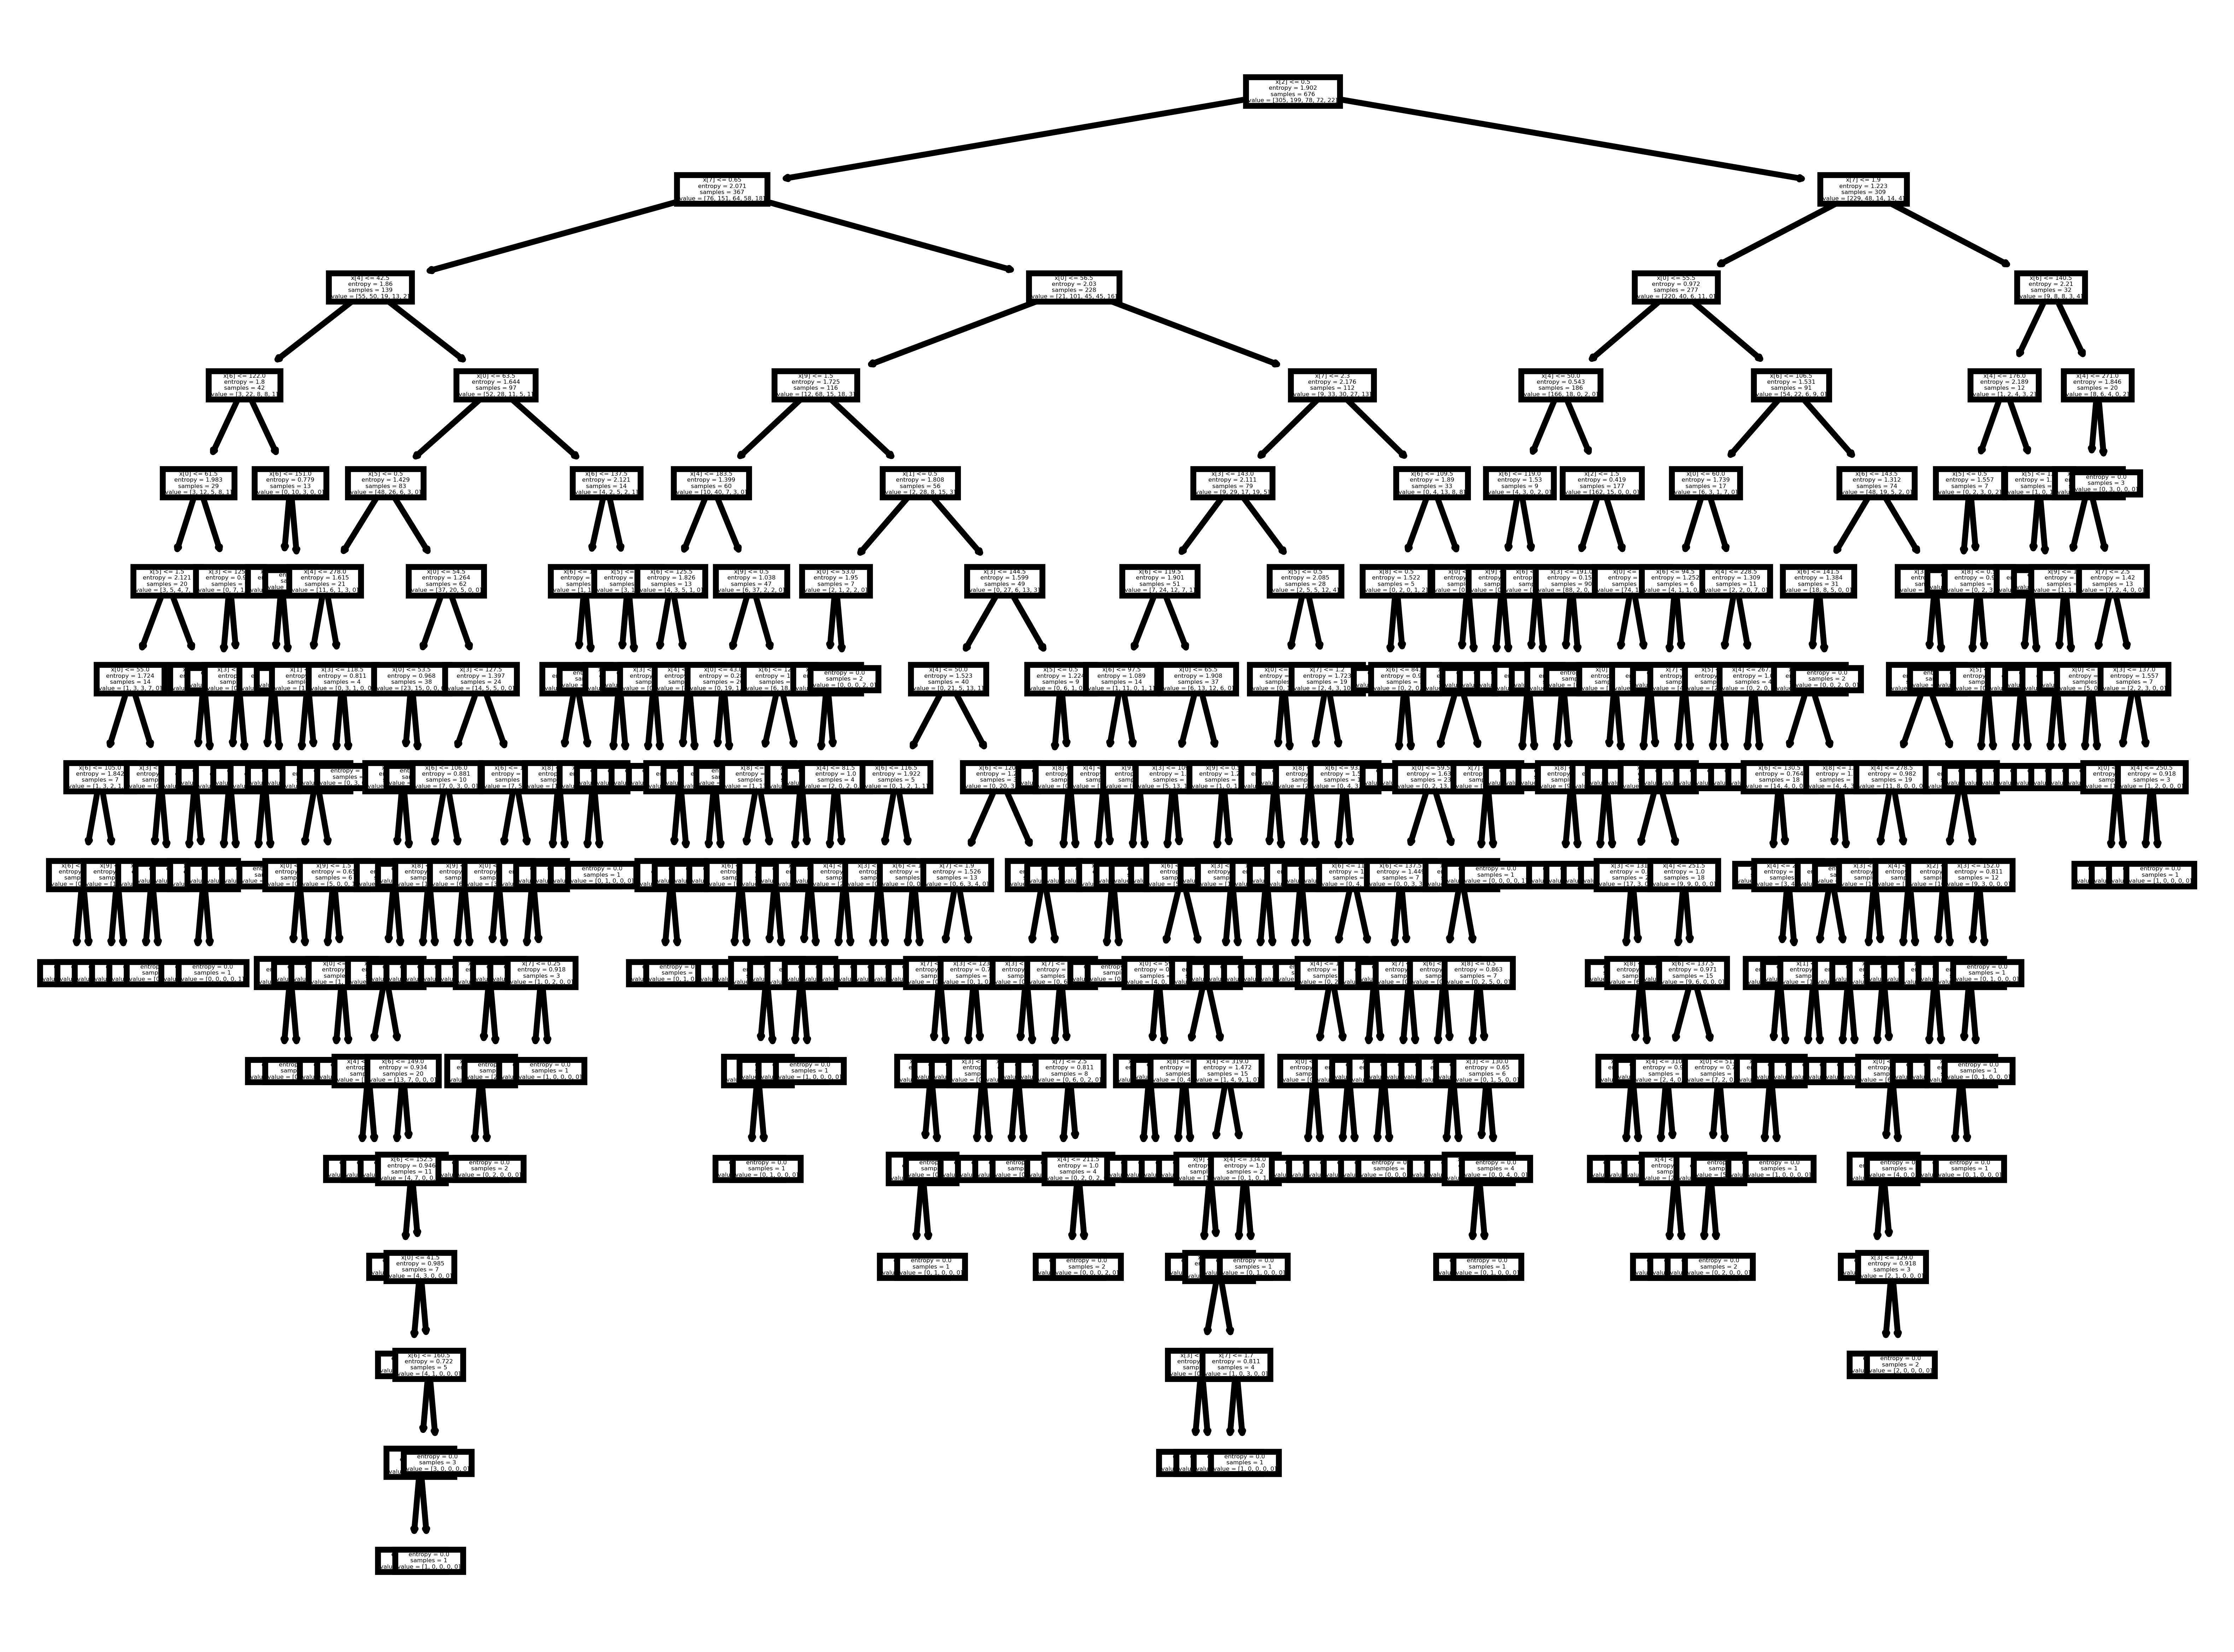

In [163]:
plt.figure(dpi=1200)
tree.plot_tree(model_entropy);

In [164]:
pred=model_entropy.predict(x_test)

In [165]:
np.mean(pred == y_test)

0.4764705882352941

In [166]:
pred_train=model_entropy.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        22

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676



In [167]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        73
           1       0.39      0.41      0.40        51
           2       0.29      0.30      0.30        23
           3       0.24      0.21      0.22        19
           4       0.00      0.00      0.00         4

    accuracy                           0.48       170
   macro avg       0.32      0.32      0.32       170
weighted avg       0.47      0.48      0.47       170



In [170]:
model_entropy.feature_importances_

array([0.16217997, 0.02015406, 0.1243192 , 0.08850142, 0.13556792,
       0.05223036, 0.19188878, 0.1278875 , 0.05168959, 0.04558121])

##### -> Here train accuracy is more then test accurecy ,because it is an overfit model and try with hyper perameters

In [172]:
model_entropy1=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=7)
model_entropy1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=7)

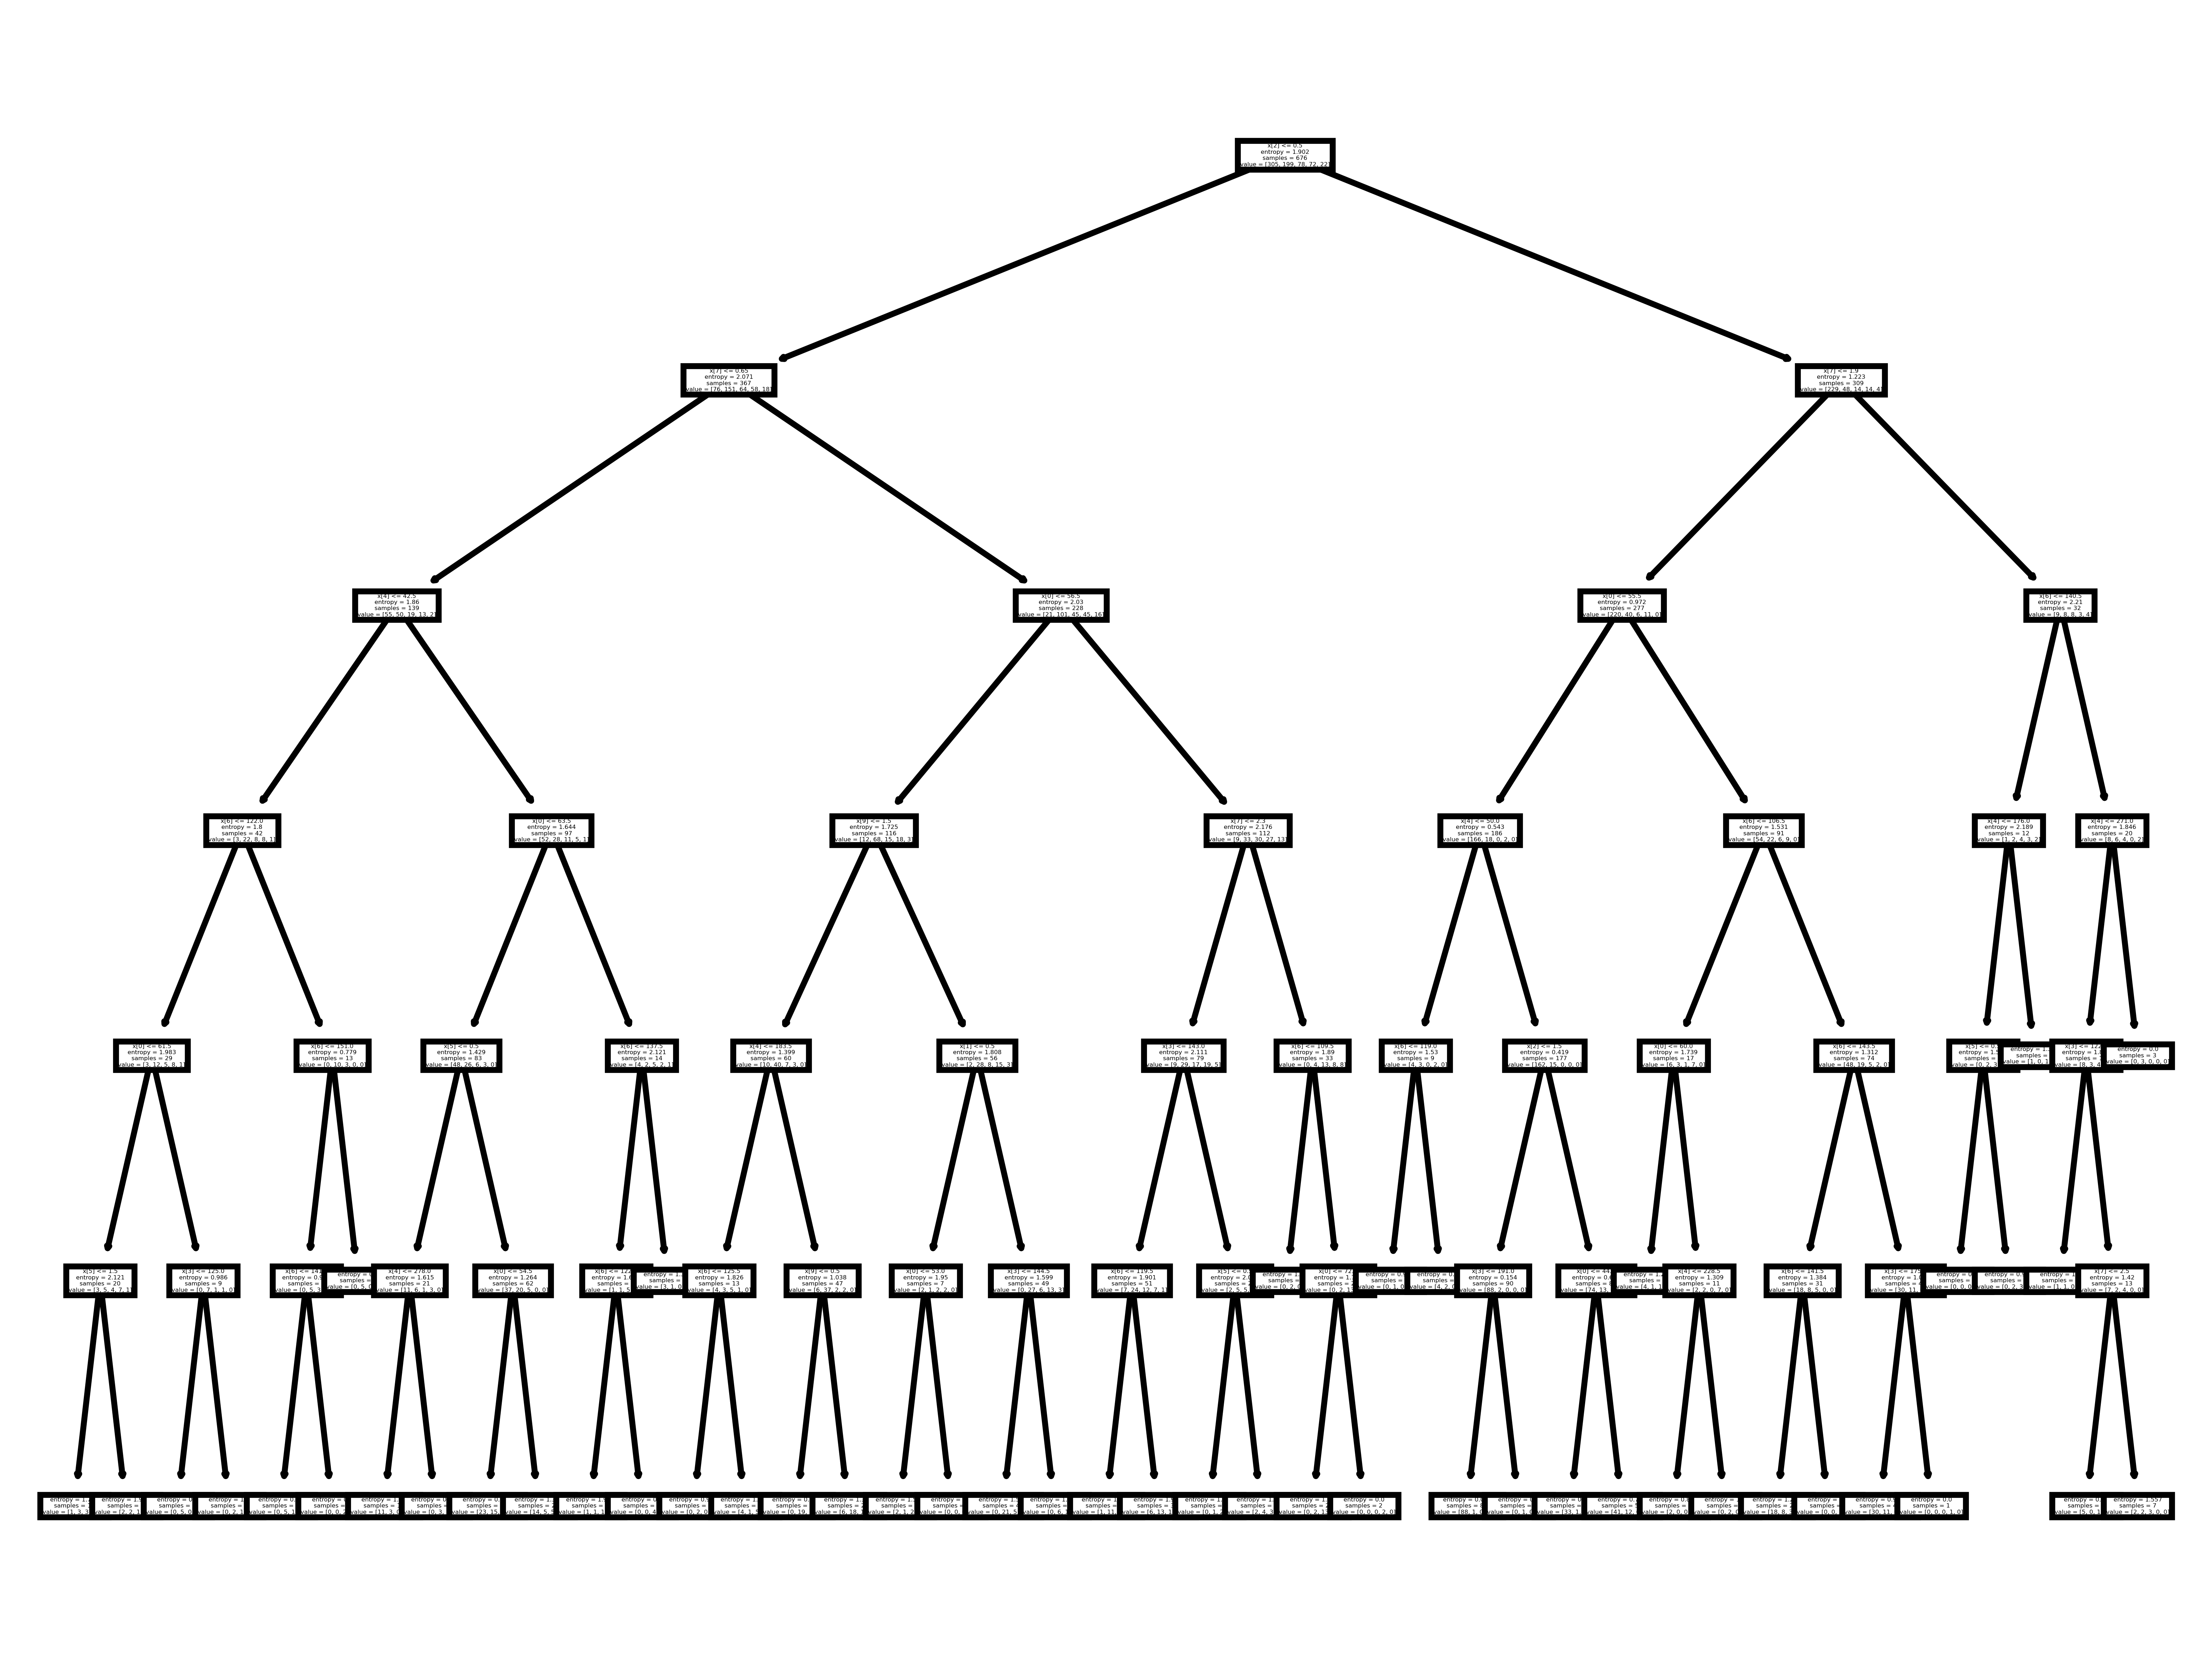

In [173]:
plt.figure(dpi=1200)
tree.plot_tree(model_entropy1);

In [186]:
pred1=model_entropy1.predict(x_test)
np.mean(pred1 == y_test)

0.4588235294117647

In [193]:
pred_train1=model_entropy1.predict(x_train)
print(classification_report(y_train,pred_train1))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       305
           1       0.63      0.59      0.61       199
           2       0.57      0.41      0.48        78
           3       0.59      0.47      0.52        72
           4       0.53      0.36      0.43        22

    accuracy                           0.70       676
   macro avg       0.62      0.55      0.58       676
weighted avg       0.68      0.70      0.68       676



In [188]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        73
           1       0.37      0.33      0.35        51
           2       0.20      0.13      0.16        23
           3       0.12      0.11      0.11        19
           4       0.00      0.00      0.00         4

    accuracy                           0.46       170
   macro avg       0.26      0.27      0.26       170
weighted avg       0.42      0.46      0.44       170



In [189]:
model_entropy1.feature_importances_

array([0.1587565 , 0.01510121, 0.25351899, 0.06192754, 0.12389432,
       0.04615864, 0.1488148 , 0.15541893, 0.        , 0.03640907])

##### -> Here very low test accuracy

In [211]:
model_entropy2=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=8)
model_entropy2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=8)

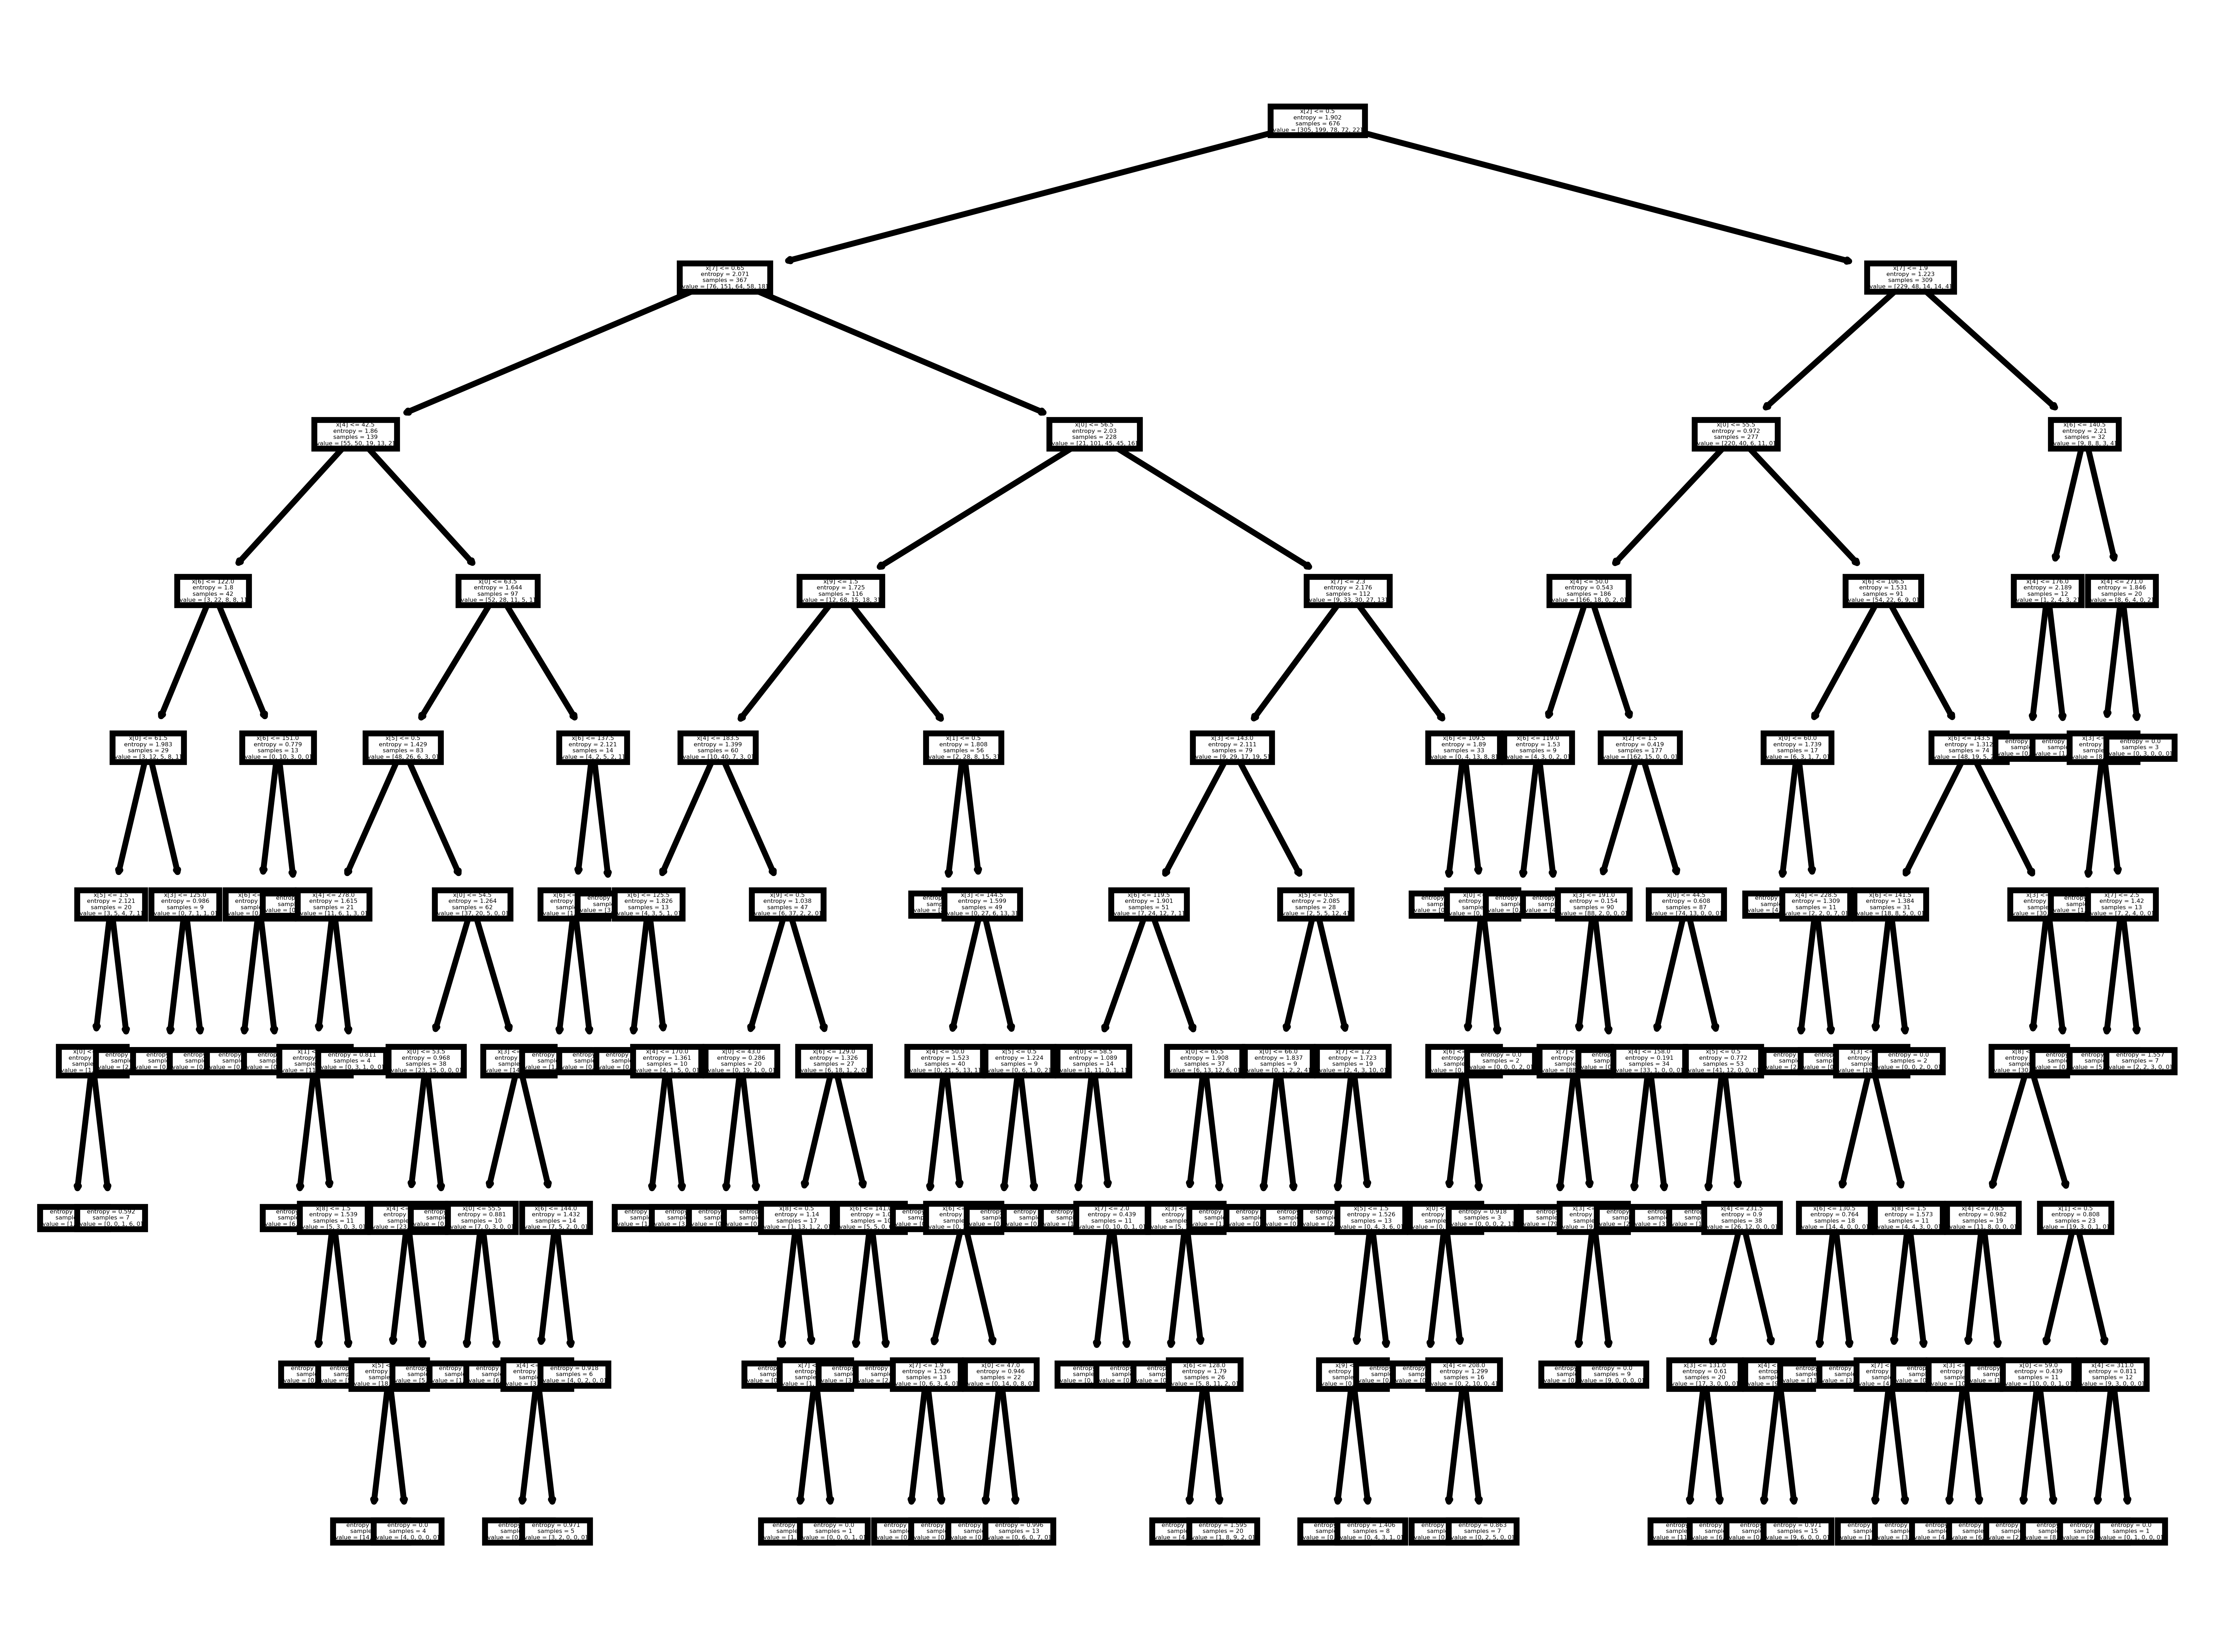

In [212]:
plt.figure(dpi=1200)
tree.plot_tree(model_entropy2);

In [219]:
pred2=model_entropy1.predict(x_test)
np.mean(pred2 == y_test)

0.4588235294117647

In [214]:
pred_train2=model_entropy2.predict(x_train)
print(classification_report(y_train,pred_train2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       305
           1       0.80      0.67      0.73       199
           2       0.58      0.65      0.61        78
           3       0.70      0.68      0.69        72
           4       0.62      0.36      0.46        22

    accuracy                           0.78       676
   macro avg       0.71      0.66      0.67       676
weighted avg       0.77      0.78      0.77       676



In [215]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        73
           1       0.41      0.35      0.38        51
           2       0.26      0.26      0.26        23
           3       0.27      0.21      0.24        19
           4       0.00      0.00      0.00         4

    accuracy                           0.48       170
   macro avg       0.31      0.31      0.31       170
weighted avg       0.46      0.48      0.47       170



##### -> Here i was tried various max_depth values but compare these all better genaral

In [217]:
model_gini=DecisionTreeClassifier()#Here the default criterion is gini
model_gini.fit(x_train,y_train)

DecisionTreeClassifier()

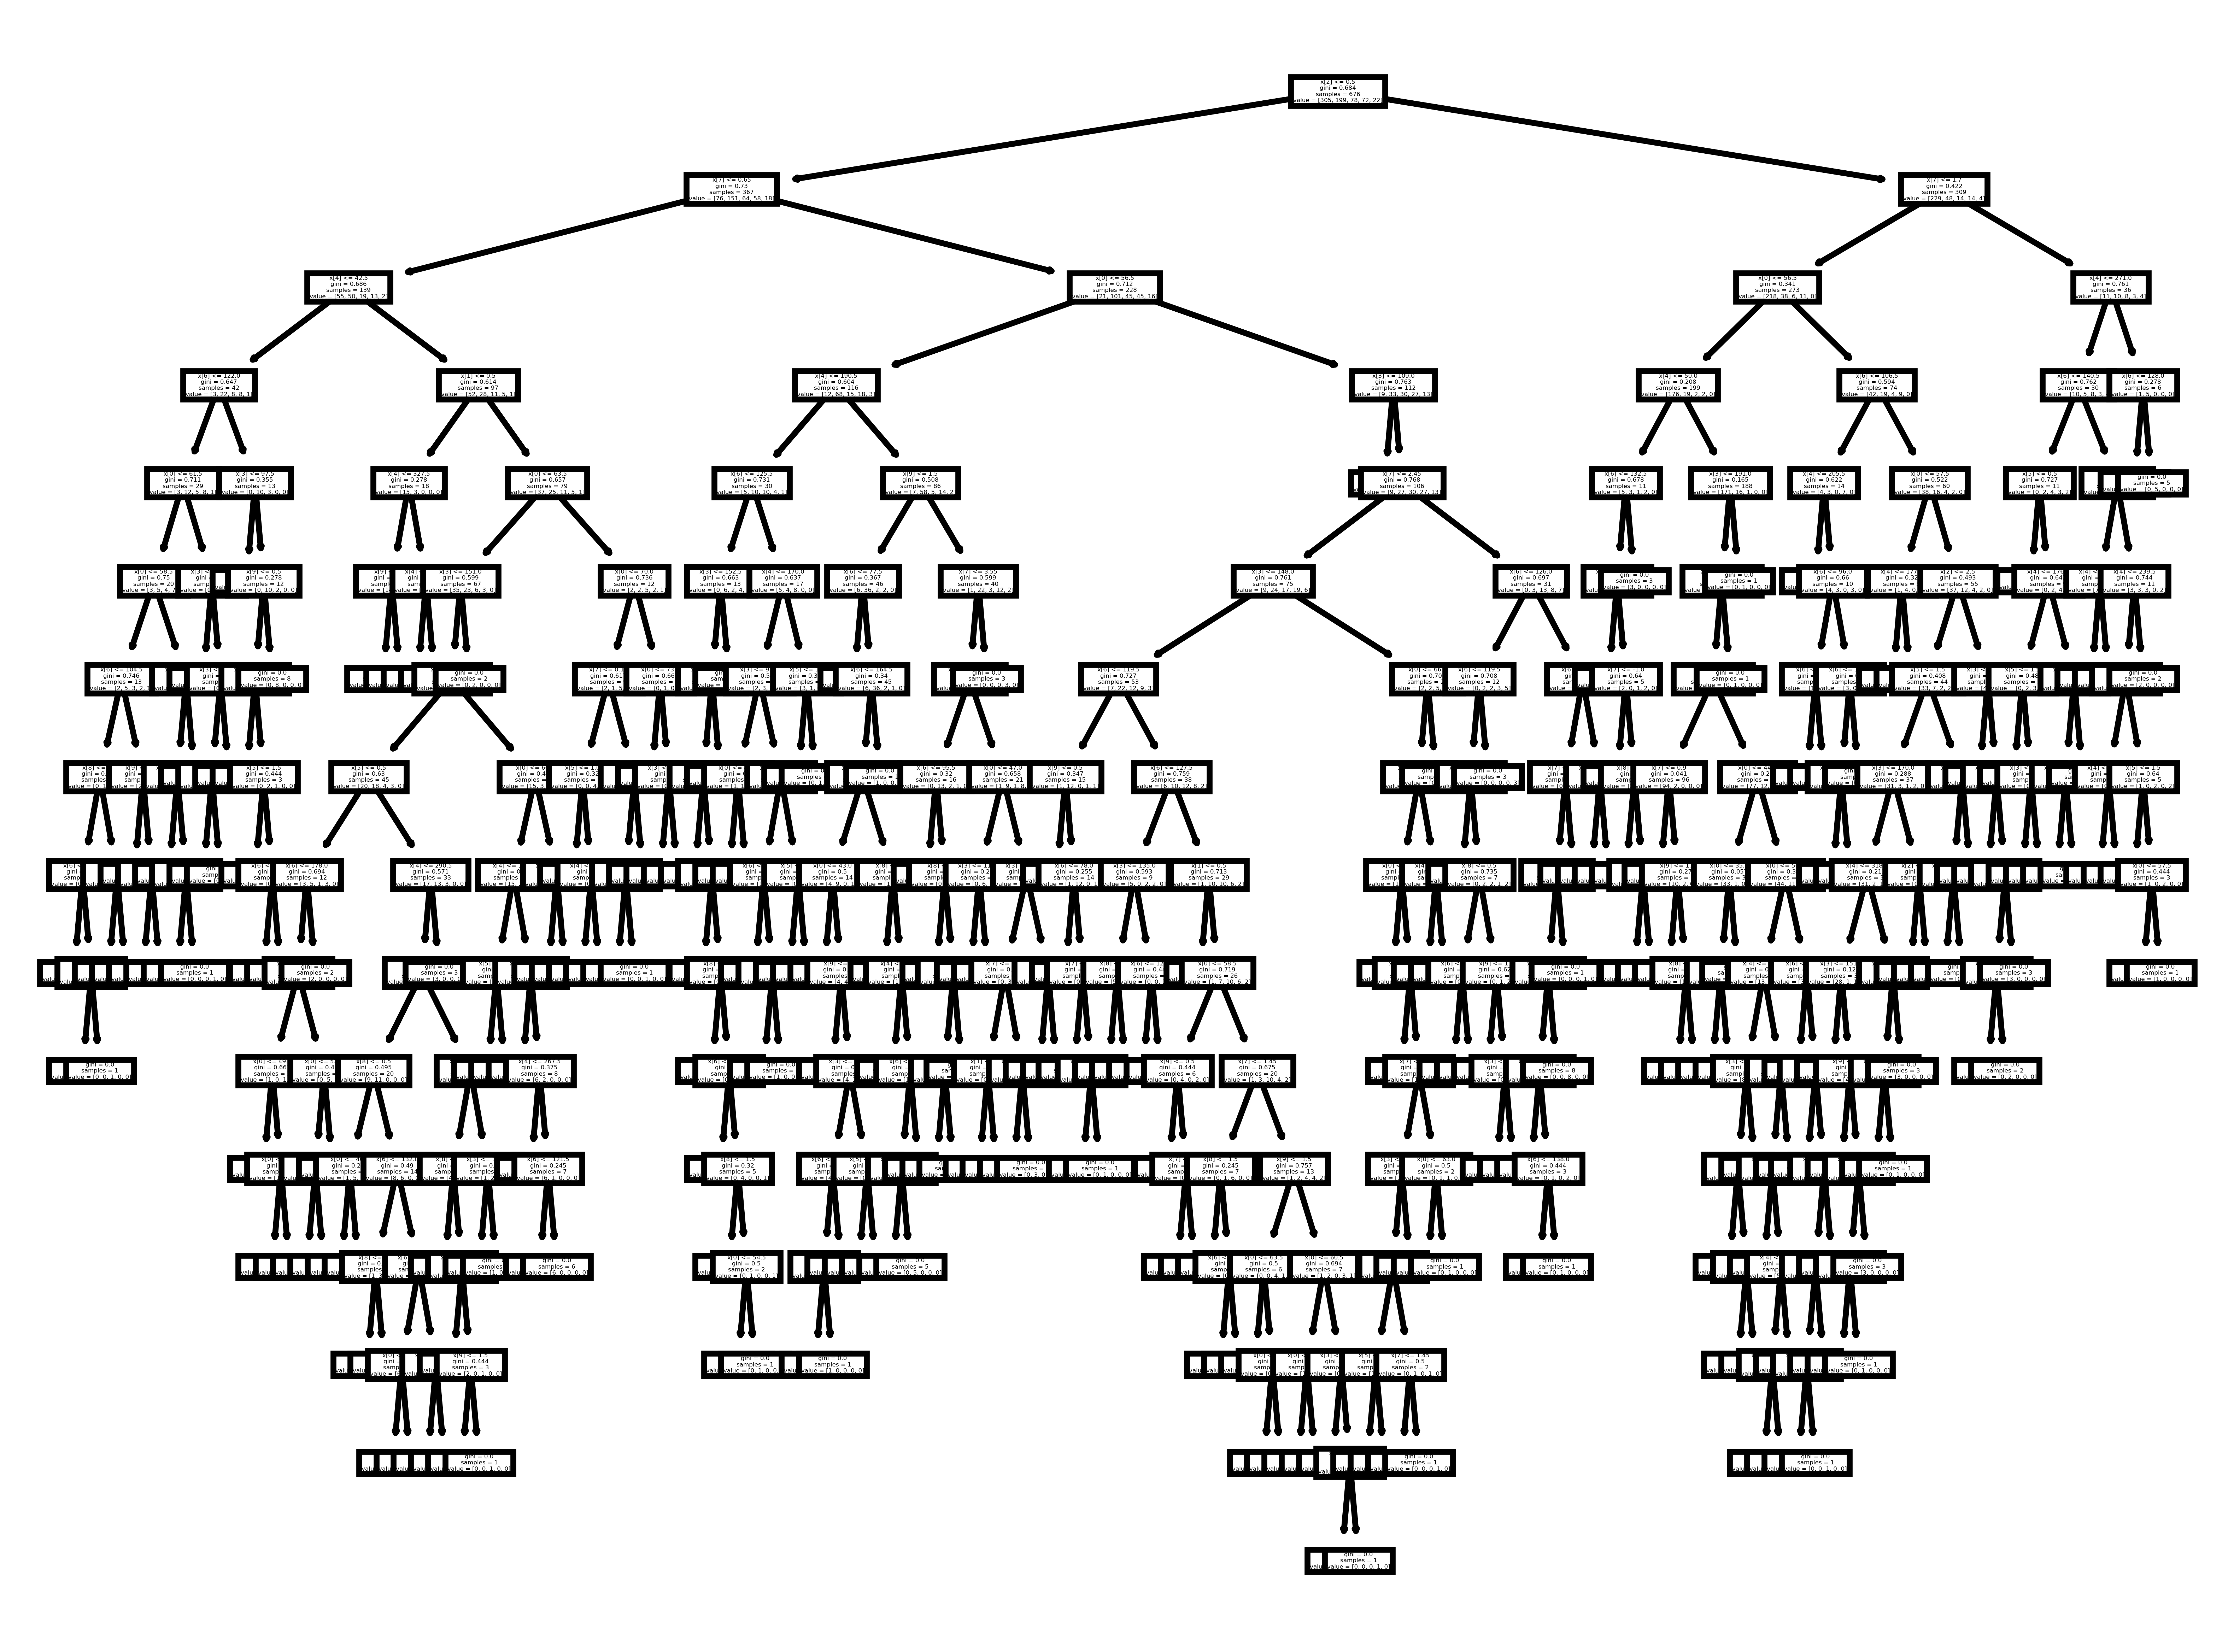

In [218]:
plt.figure(dpi=1200)
tree.plot_tree(model_gini);

In [220]:
predg=model_gini.predict(x_test)
np.mean(predg == y_test)

0.48823529411764705

In [221]:
pred_traing=model_gini.predict(x_train)
print(classification_report(y_train,pred_traing))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        22

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676



In [222]:
print(classification_report(y_test,predg))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66        73
           1       0.43      0.45      0.44        51
           2       0.25      0.22      0.23        23
           3       0.36      0.26      0.30        19
           4       0.00      0.00      0.00         4

    accuracy                           0.49       170
   macro avg       0.33      0.32      0.33       170
weighted avg       0.48      0.49      0.48       170



In [223]:
model_gini.feature_importances_

array([0.15817658, 0.0164879 , 0.14825187, 0.13726286, 0.13936563,
       0.04988618, 0.16859685, 0.0902291 , 0.03460497, 0.05713805])

##### -> Here the using ceiterion is gini without any hyperparameters then we got train accuracy is 100% and test accuracy is only 67%

In [224]:
model_gini1=DecisionTreeClassifier(max_depth=6,min_samples_split=7)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=7)

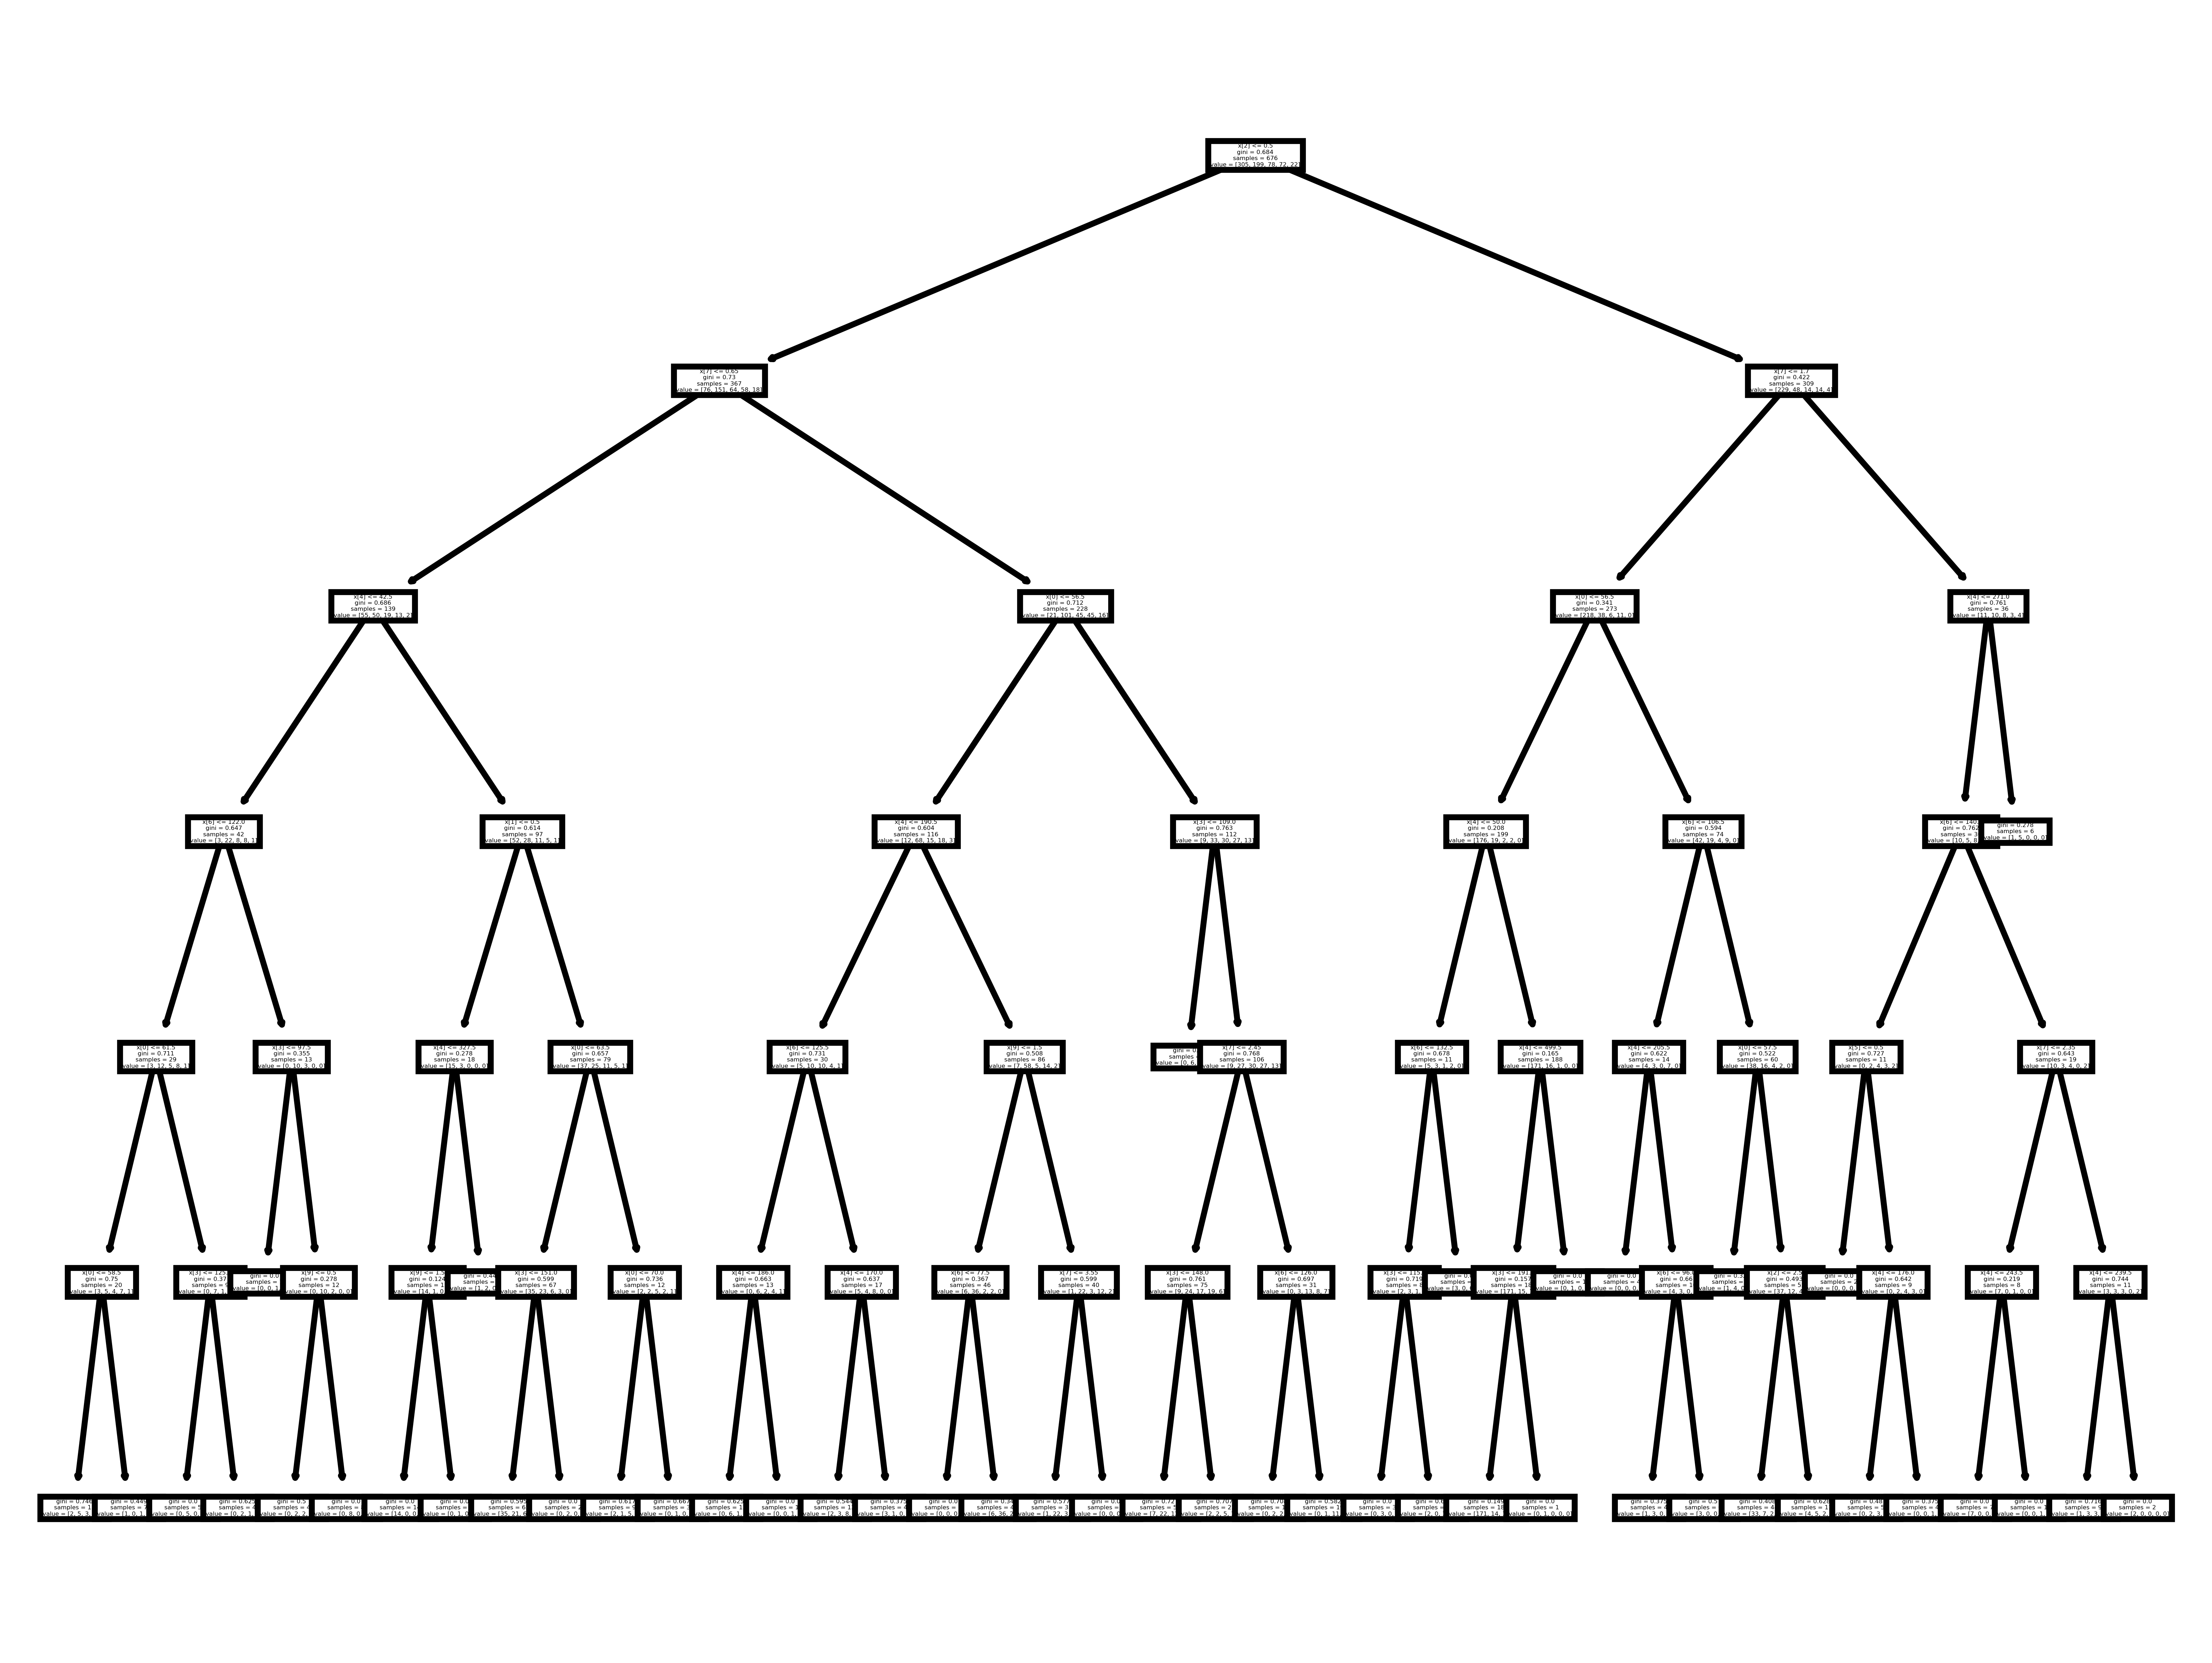

In [225]:
plt.figure(dpi=1200)
tree.plot_tree(model_gini1);

In [226]:
predg1=model_gini1.predict(x_test)
np.mean(predg1 == y_test)

0.48823529411764705

In [227]:
pred_traing1=model_gini1.predict(x_train)
print(classification_report(y_train,pred_traing1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       305
           1       0.61      0.73      0.67       199
           2       0.61      0.38      0.47        78
           3       0.63      0.36      0.46        72
           4       0.50      0.32      0.39        22

    accuracy                           0.71       676
   macro avg       0.63      0.54      0.57       676
weighted avg       0.70      0.71      0.70       676



In [228]:
print(classification_report(y_test,predg1))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        73
           1       0.40      0.47      0.43        51
           2       0.23      0.13      0.17        23
           3       0.23      0.16      0.19        19
           4       1.00      0.25      0.40         4

    accuracy                           0.49       170
   macro avg       0.50      0.34      0.37       170
weighted avg       0.47      0.49      0.47       170



In [229]:
model_gini1.feature_importances_

array([0.13027201, 0.01331679, 0.3358382 , 0.07579533, 0.16858111,
       0.01126473, 0.09365623, 0.14046489, 0.        , 0.03081071])

##### -> To analyze the performance of a Decision Tree model on a heart disease dataset, we typically evaluate it using standard classification metrics. These metrics help us understand how well the model predicts the presence or absence of heart disease based on the features provided.

##### ->By analyzing these evaluation metrics, you can gain insights into how well your Decision Tree model performs on predicting heart disease based on the dataset features. These metrics help in understanding the strengths and weaknesses of the model and guide further improvements or adjustments to enhance its predictive accuracy and reliability. Always interpret these metrics in the context of the specific problem and consider the implications of false positives and false negatives in your analysis.

### Interview Quetions

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1. Criterion
Criterion measures the quality of a split in a Decision Tree. The two main criteria are:
Gini impurity: Measures how often a randomly chosen element would be incorrectly classified.
Entropy: Measures the information gain (reduction in entropy) achieved by a split.
Choosing between Gini impurity and entropy affects how the Decision Tree splits nodes. Generally, Gini impurity is faster to compute, while entropy tends to create more balanced trees.

2. Max Depth
Maximum depth of the tree from the root to the furthest leaf.
Controlling the maximum depth helps prevent overfitting. A deeper tree can model more complex relationships but is more likely to overfit the training data.

3. Min Samples Split
Minimum number of samples required to split an internal node.
Prevents the model from making splits that only have a few samples, which can lead to overfitting.

Hyperparameter Tuning:
Grid Search and Cross-Validation: Use techniques like grid search with cross-validation to find the optimal combination of hyperparameters that maximize model performance.
Consider the problem domain and characteristics of the dataset when selecting hyperparameters. For example, understanding the data distribution can guide choices for class weights or split criteria.

#### 2. What is the difference between the Label encoding and One-hot encoding?

Label encoding and one-hot encoding are both techniques used in preprocessing categorical data for machine learning models, but they operate in different ways and are suitable for different types of categorical variables
1. Label Encoding:
Label encoding converts each categorical value into a numerical label (integer).
Typically used for ordinal categorical variables where there is a natural ordering among the categories.
Example: Convert categories like "low", "medium", "high" into 0, 1, 2 respectively.
Assigns a unique integer to each category.
Transforms categorical data into numerical data.
Preserves ordinality (order) if present in the categorical variable.

2. One-Hot Encoding:
One-hot encoding creates a binary column for each category of the variable.
Suitable for nominal categorical variables where there is no inherent order among the categories.
Example: Convert categories into binary vectors where each vector has a 1 for the category and 0s for all other categories.
Creates a new binary column for each category.
Each column indicates the presence (1) or absence (0) of the category.
Avoids imposing ordinality on categorical variables.